In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [149]:
df = pd.read_csv('/home/ramaksha-birajdar/Desktop/Real_Estate/data/processed/flats_cleaned.csv')
df.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,flat,maa bhagwati residency,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,"Krishna Colony, Gurgaon, Haryana",4.0,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,flat,apna enclave,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,"46b, Ashok Vihar, Gurgaon, Haryana",1.0,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,flat,tulsiani easy in homes,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,"Sohna, Gurgaon, Haryana",12.0,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,flat,smart world orchard,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,"Sector 61 Gurgaon, Gurgaon, Haryana",2.0,NaN,Dec 2023,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,flat,parkwood westend,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,study room,"Sector 92 Gurgaon, Gurgaon, Haryana",5.0,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


In [150]:
df['property_type'].value_counts()

property_type
flat    2996
Name: count, dtype: int64

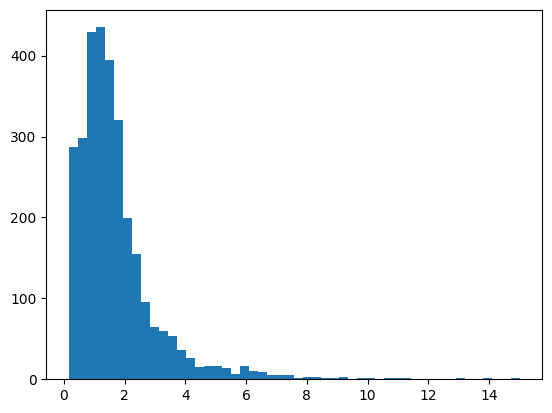

In [151]:
plt.hist(x=df['price'],bins=50);

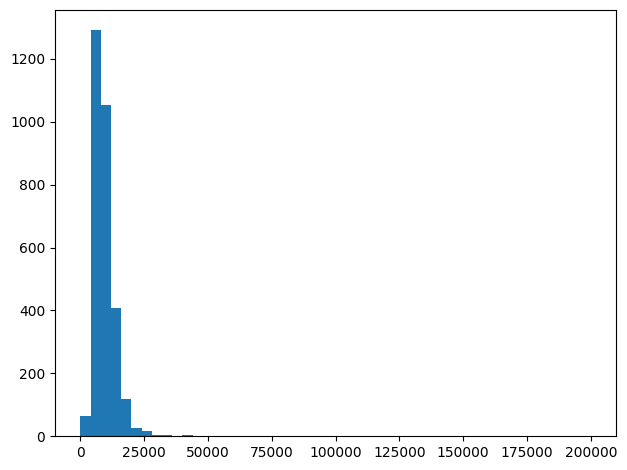

In [152]:
plt.hist(x=df['price_per_sqft'],bins=50);
plt.tight_layout()

Text(0.5, 0, 'Area')

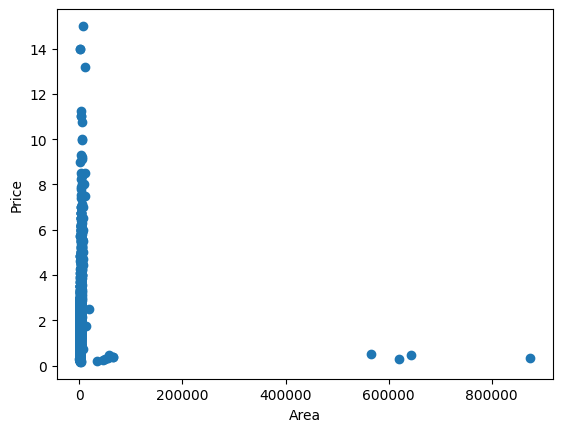

In [153]:
plt.scatter(y=df['price'],x=df['area'])
plt.ylabel('Price')
plt.xlabel('Area')

In [154]:
#Shows that Price and Area are not really correlated
df.corr(numeric_only=True)

,price,price_per_sqft,area,bedRoom,bathroom,floorNum
price,1.000000,0.611606,-0.011755,0.553454,0.593445,0.198323
price_per_sqft,0.611606,1.000000,-0.055087,0.144119,0.180851,0.080254
area,-0.011755,-0.055087,1.000000,-0.015593,-0.012037,-0.015928
bedRoom,0.553454,0.144119,-0.015593,1.000000,0.830701,0.095475
bathroom,0.593445,0.180851,-0.012037,0.830701,1.000000,0.123844
floorNum,0.198323,0.080254,-0.015928,0.095475,0.123844,1.000000


<BarContainer object of 5 artists>

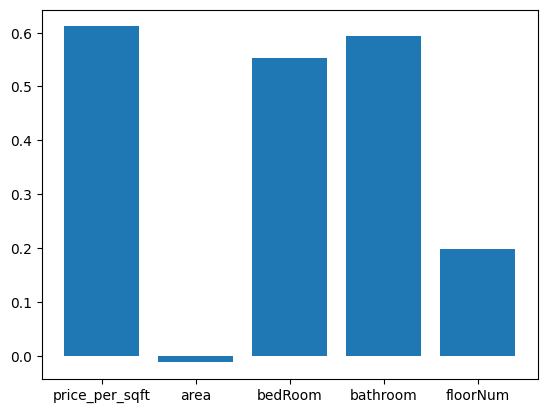

In [155]:
plt.bar(df.corr(numeric_only=True)['price'].drop('price').index,df.corr(numeric_only=True)['price'].drop('price').values)

In [156]:
#Price per sqrt,bedroom,bathroom have correlation with Price

In [157]:
df.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,flat,maa bhagwati residency,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,"Krishna Colony, Gurgaon, Haryana",4.0,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,flat,apna enclave,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,"46b, Ashok Vihar, Gurgaon, Haryana",1.0,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,flat,tulsiani easy in homes,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,"Sohna, Gurgaon, Haryana",12.0,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,flat,smart world orchard,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,"Sector 61 Gurgaon, Gurgaon, Haryana",2.0,NaN,Dec 2023,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,flat,parkwood westend,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,study room,"Sector 92 Gurgaon, Gurgaon, Haryana",5.0,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_name    2996 non-null   object 
 1   property_type    2996 non-null   object 
 2   society          2995 non-null   object 
 3   price            2996 non-null   float64
 4   price_per_sqft   2996 non-null   float64
 5   area             2996 non-null   float64
 6   areaWithType     2996 non-null   object 
 7   bedRoom          2996 non-null   int64  
 8   bathroom         2996 non-null   int64  
 9   balcony          2996 non-null   object 
 10  additionalRoom   2996 non-null   object 
 11  address          2990 non-null   object 
 12  floorNum         2994 non-null   float64
 13  facing           2122 non-null   object 
 14  agePossession    2995 non-null   object 
 15  nearbyLocations  2905 non-null   object 
 16  description      2996 non-null   object 
 17  furnishDetails

In [159]:
df[['price','facing']].groupby(by='facing').mean()

,price
facing,
East,1.748384
North,1.806478
North-East,1.939426
North-West,1.695000
South,1.776059
South-East,1.947639
South-West,1.732074
West,1.821749


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'East'),
  Text(1, 0, 'North'),
  Text(2, 0, 'North-East'),
  Text(3, 0, 'North-West'),
  Text(4, 0, 'South'),
  Text(5, 0, 'South-East'),
  Text(6, 0, 'South-West'),
  Text(7, 0, 'West')])

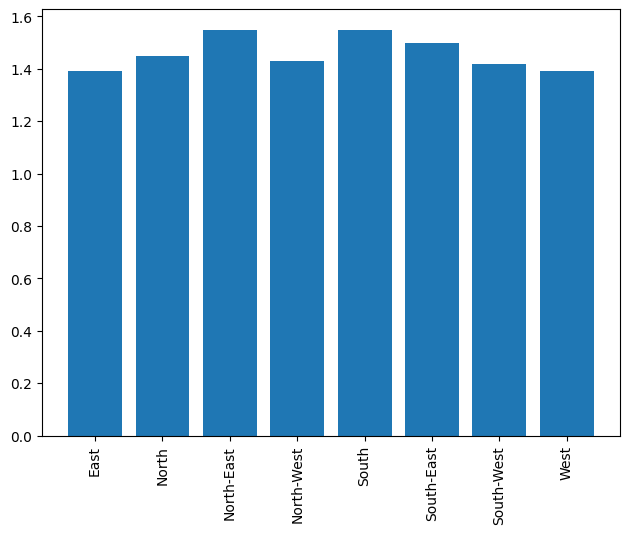

In [160]:
plt.bar(df[['price','facing']].groupby(by='facing').median().index,df[['price','facing']].groupby(by='facing').median()['price'])
plt.tight_layout()
plt.xticks(rotation=90)

In [161]:
#facing has no strong correlation with the data

In [162]:
df['balcony'].value_counts()

balcony
3     973
3+    862
2     749
1     315
0      97
Name: count, dtype: int64

In [163]:
c=0
s=set()
for i in df['balcony']:
    if type(i) in s:
        continue
    else:
        s.add(type(i))
print(s)


{<class 'str'>}


In [164]:
df['balcony'].value_counts()

balcony
3     973
3+    862
2     749
1     315
0      97
Name: count, dtype: int64

In [165]:
balcony_df=pd.get_dummies(df['balcony'])

In [166]:
balcony_df['price']=df['price']

In [167]:
balcony_df.corr()['price']

0       -0.031778
1       -0.245623
2       -0.179502
3        0.071728
3+       0.276349
price    1.000000
Name: price, dtype: float64

<BarContainer object of 5 artists>

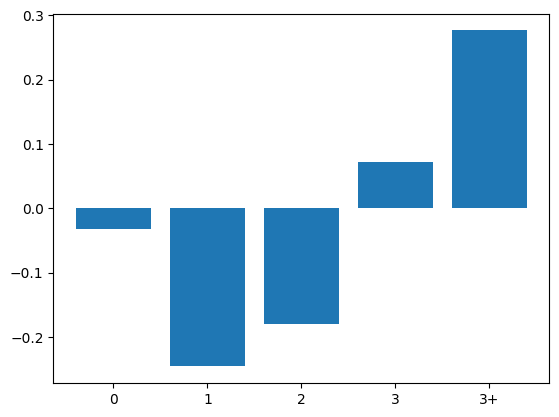

In [168]:
plt.bar(balcony_df.corr()['price'].drop('price').index,balcony_df.corr()['price'].drop('price').values)

In [169]:
df.columns

Index(['property_name', 'property_type', 'society', 'price', 'price_per_sqft',
       'area', 'areaWithType', 'bedRoom', 'bathroom', 'balcony',
       'additionalRoom', 'address', 'floorNum', 'facing', 'agePossession',
       'nearbyLocations', 'description', 'furnishDetails', 'features',
       'rating'],
      dtype='object')

Text(0, 0.5, 'No of Flats')

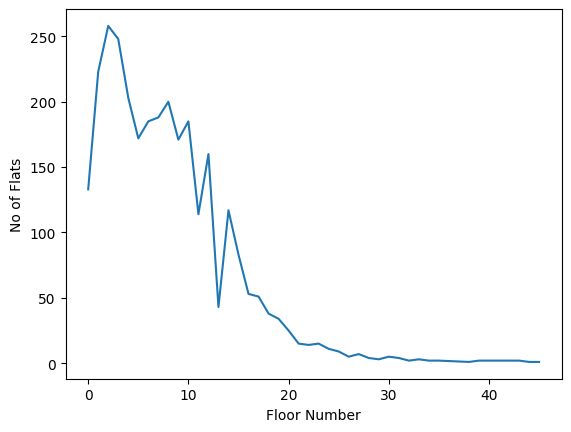

In [170]:
plt.plot(df['floorNum'].value_counts().sort_index().index,df['floorNum'].value_counts().sort_index().values)
plt.xlabel('Floor Number')
plt.ylabel('No of Flats')

In [171]:
floor_df=df[['floorNum','price']].groupby('floorNum').mean()
floor_df.head()

,price
floorNum,
0.0,1.555564
1.0,1.429596
2.0,1.499535
3.0,1.571734
4.0,1.433448


In [172]:
floor_df.reset_index(inplace=True)

<Axes: xlabel='floorNum', ylabel='price'>

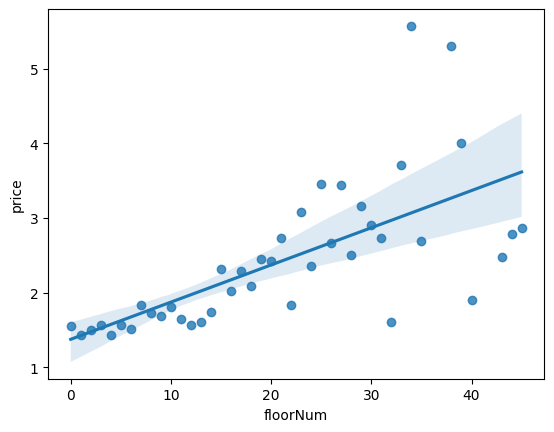

In [173]:
sns.regplot(data=floor_df,x='floorNum',y='price')

In [174]:
# increase in price of flat with floorNum

In [175]:
df.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,flat,maa bhagwati residency,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,"Krishna Colony, Gurgaon, Haryana",4.0,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,flat,apna enclave,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,"46b, Ashok Vihar, Gurgaon, Haryana",1.0,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,flat,tulsiani easy in homes,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,"Sohna, Gurgaon, Haryana",12.0,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,flat,smart world orchard,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,"Sector 61 Gurgaon, Gurgaon, Haryana",2.0,NaN,Dec 2023,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,flat,parkwood westend,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,study room,"Sector 92 Gurgaon, Gurgaon, Haryana",5.0,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


In [176]:
s=set()
for i in df['address']:
    if type(i) in s:
        continue
    else:
        s.add(type(i))
print(s)

{<class 'float'>, <class 'str'>}


In [177]:
s=set()
for i in df['address']:
    if type(i) ==float:
        s.add(i)
print(s)

{nan}


In [178]:
# state
s=set()
for i in df['address'].dropna():
    if i.split(',')[-1] in s:
        continue
    else:
        s.add(i.split(',')[-1])
print(s)

{' Haryana'}


In [179]:
# state
s=set()
for i in df['address'].dropna():
    if i.split(',')[-2] in s:
        continue
    else:
        s.add(i.split(',')[-2])
print(s)

{' Gurgaon'}


In [180]:
# colonies
s=[]
for i in df['address'].dropna():
    s.append(i.split(',')[-3])
        
print(s)

['Krishna Colony', ' Ashok Vihar', 'Sohna', 'Sector 61 Gurgaon', 'Sector 92 Gurgaon', ' Sector 36 Gurgaon', 'Dwarka Expressway Gurgaon', 'Sector 104 Gurgaon', ' Sector 88B Gurgaon', 'Sector 78 Gurgaon', 'Sector 81 Gurgaon', 'Sohna', 'Sector 79 Gurgaon', ' Sector 33 Gurgaon', 'Sector 90 Gurgaon', ' Sector 108 Gurgaon', ' Sector 62 Gurgaon', ' Sector 102 Gurgaon', 'Sector-33 Sohna', 'Sector 89 Gurgaon', 'Sector 79 Gurgaon', 'Sector 89 Gurgaon', 'Sector 102 Gurgaon', 'Sector 113 Gurgaon ', ' Sector 36 Gurgaon', ' Sector 65 Gurgaon', 'Sector 48 Gurgaon', 'Sector 37C Gurgaon', ' Sector 3 Gurgaon', 'New Palam Vihar', 'Sector 43 Gurgaon', ' Sector 88A Gurgaon', ' Sector 92 Gurgaon', ' Sector 90 Gurgaon', ' Sector 68 Gurgaon', 'Sector 109 Gurgaon', ' Sohna', ' Sector 37C Gurgaon', ' Sector 43 Gurgaon', 'Sohna', ' Sector 106 Gurgaon', 'Sector 82 Gurgaon', ' Ashok Vihar Phase 3 Extension', 'Sohna', 'Sector 90 Gurgaon', 'Sector 106 Gurgaon', 'Sector 85 Gurgaon', 'Sector 82A Gurgaon', ' Sector 65 

In [181]:
len(s)

2990

In [182]:
colony_price=df[['price','address']].dropna()['price']

In [183]:
colony_df = pd.DataFrame({'price':colony_price,'colony_name':s})

In [184]:
colony_df.head()

,price,colony_name
0,0.45,Krishna Colony
1,0.50,Ashok Vihar
2,0.40,Sohna
3,1.47,Sector 61 Gurgaon
4,0.70,Sector 92 Gurgaon


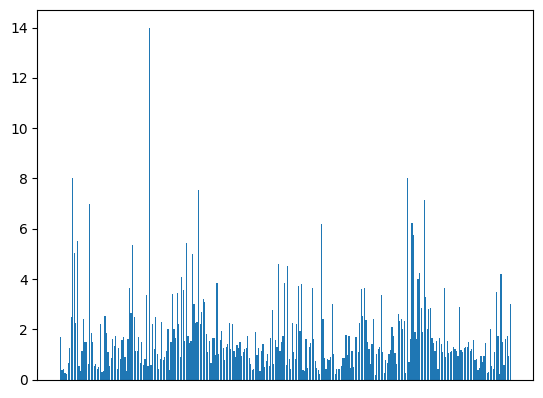

In [185]:
plt.bar(colony_df.groupby('colony_name').median().index,colony_df.groupby('colony_name').median()['price'])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

In [186]:
df.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,flat,maa bhagwati residency,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,"Krishna Colony, Gurgaon, Haryana",4.0,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,flat,apna enclave,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,"46b, Ashok Vihar, Gurgaon, Haryana",1.0,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,flat,tulsiani easy in homes,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,"Sohna, Gurgaon, Haryana",12.0,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,flat,smart world orchard,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,"Sector 61 Gurgaon, Gurgaon, Haryana",2.0,NaN,Dec 2023,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,flat,parkwood westend,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,study room,"Sector 92 Gurgaon, Gurgaon, Haryana",5.0,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


In [187]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1304
servant room                                      629
study room                                        232
others                                            179
pooja room                                        132
study room,servant room                            81
store room                                         76
pooja room,servant room                            60
servant room,others                                52
servant room,pooja room                            30
study room,others                                  27
pooja room,study room,servant room,others          25
pooja room,study room,servant room                 24
servant room,store room                            19
pooja room,study room                              13
pooja room,study room,servant room,store room      12
servant room,study room                             8
study room,pooja room                               8
study room,se

In [188]:
area_type=[]
for i in df['areaWithType']:
    area_type.append(i.split('area')[0][:-1])
print(area_type)    

['Carpet', 'Carpet', 'Carpet', 'Carpet', 'Super Built up', 'Built Up', 'Super Built up', 'Carpet', 'Built Up', 'Built Up', 'Carpet', 'Carpet', 'Carpet', 'Super Built up', 'Super Built up', 'Built Up', 'Built Up', 'Carpet', 'Super Built up', 'Carpet', 'Super Built up', 'Super Built up', 'Carpet', 'Super Built up', 'Carpet', 'Built Up', 'Carpet', 'Carpet', 'Built Up', 'Carpet', 'Super Built up', 'Carpet', 'Built Up', 'Carpet', 'Super Built up', 'Super Built up', 'Super Built up', 'Super Built up', 'Carpet', 'Carpet', 'Carpet', 'Super Built up', 'Carpet', 'Built Up', 'Carpet', 'Carpet', 'Carpet', 'Carpet', 'Carpet', 'Carpet', 'Carpet', 'Carpet', 'Carpet', 'Carpet', 'Carpet', 'Carpet', 'Super Built up', 'Super Built up', 'Super Built up', 'Super Built up', 'Super Built up', 'Super Built up', 'Super Built up', 'Super Built up', 'Super Built up', 'Super Built up', 'Super Built up', 'Super Built up', 'Built Up', 'Super Built up', 'Carpet', 'Super Built up', 'Carpet', 'Carpet', 'Carpet', 'Carp

In [189]:
area_type_df = pd.DataFrame({'price':df['price'],'area_type':area_type})
area_type_df.head()

,price,area_type
0,0.45,Carpet
1,0.50,Carpet
2,0.40,Carpet
3,1.47,Carpet
4,0.70,Super Built up


In [190]:
area_type_df.groupby('area_type').mean()

,price
area_type,
Built Up,1.680366
Carpet,1.454936
Super Built up,1.804452


<BarContainer object of 3 artists>

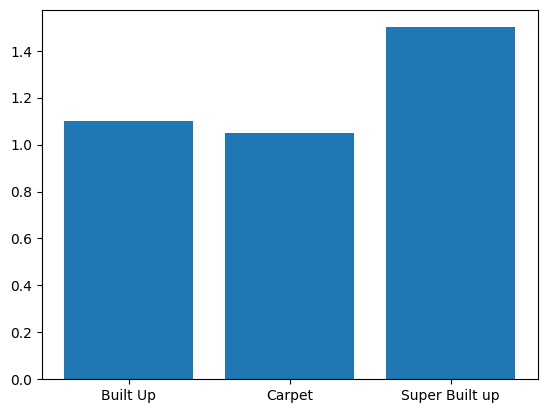

In [191]:
plt.bar(area_type_df.groupby('area_type').median().index,area_type_df.groupby('area_type').median()['price'])

In [192]:
# Super Built up has more median price than others

In [193]:
df.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Krishna Colony,flat,maa bhagwati residency,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,"Krishna Colony, Gurgaon, Haryana",4.0,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ..."
1,2 BHK Flat in Ashok Vihar,flat,apna enclave,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,"46b, Ashok Vihar, Gurgaon, Haryana",1.0,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ..."
2,2 BHK Flat in Sohna,flat,tulsiani easy in homes,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,"Sohna, Gurgaon, Haryana",12.0,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ..."
3,2 BHK Flat in Sector 61 Gurgaon,flat,smart world orchard,1.47,12250.0,1200.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,"Sector 61 Gurgaon, Gurgaon, Haryana",2.0,NaN,Dec 2023,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN
4,2 BHK Flat in Sector 92 Gurgaon,flat,parkwood westend,0.70,5204.0,1345.0,Super Built up area 1345(124.95 sq.m.),2,2,3,study room,"Sector 92 Gurgaon, Gurgaon, Haryana",5.0,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ..."


In [194]:
df['agePossession'].value_counts().index

Index(['1 to 5 Year Old', '0 to 1 Year Old', '5 to 10 Year Old', 'undefined',
       '10+ Year Old', 'Under Construction', 'Within 6 months',
       'Within 3 months', 'Dec 2023', 'By 2023', 'By 2024', 'Dec 2024',
       'Mar 2024', 'Aug 2023', 'Dec 2025', 'Jan 2024', 'Oct 2024', 'Nov 2023',
       'Jun 2024', 'Aug 2024', 'Jul 2024', 'Sep 2023', 'By 2025', 'Jan 2025',
       'May 2024', 'Nov 2024', 'Feb 2024', 'Oct 2023', 'Aug 2025', 'Sep 2025',
       'Apr 2026', 'Dec 2026', 'Jun 2027', 'Oct 2025', 'Mar 2025', 'Jul 2027',
       'Jul 2025', 'Jan 2026', 'Jan 2027', 'Jul 2026', 'Nov 2025', 'Apr 2024',
       'By 2027', 'Sep 2027', 'Jan 2028', 'Jun 2025', 'Mar 2026', 'Aug 2026'],
      dtype='object', name='agePossession')

In [238]:
def treat_property_age(x):
    if type(x)==float or type(x)==int:
        return x
    x = x.lower()
    if x=='undefined':
        x=np.nan
    elif x.split(" ")[-1]=='old' and x.split(' ')[1]!='year':
        x=(int(x.split(" ")[0])+int(x.split(" ")[2]))/2
    elif x.split(' ')[1]=='year':
        x=int(x.split(' ')[0][:-1])
    elif x.split(' ')[-1] in ('months','month'):
        x=0
    elif x=='under construction':
        x='uc'
    elif x.split(" ")[0]=='By':
        x='uc'
    elif x.split(" ")[-1].isdigit():
        if int(x.split(" ")[-1])>int(pd.Timestamp("today").strftime("%m/%d/%Y")[-4:]):
            x=np.nan
        else:
            x= -int(x.split(" ")[-1])+int(pd.Timestamp("today").strftime("%m/%d/%Y")[-4:])
    return x

In [224]:
treat_property_age('Aug 2020')

4

In [239]:
pred_ages=df['agePossession'].apply(treat_property_age)

In [240]:
s={}
for i in df['agePossession']:
    if type(i) not in s:
        s[type(i)]=1
    else:
        s[type(i)]+=1

print(s)

{<class 'str'>: 2995, <class 'float'>: 1}


In [241]:
ages_price_df = pd.DataFrame({'age':pred_ages,'price':df['price']})

In [242]:
ages_price_df.head()

,age,price
0,3.0,0.45
1,10,0.50
2,0.5,0.40
3,1,1.47
4,uc,0.70


In [231]:
np.min(pred_ages),np.max(pred_ages)

(np.float64(0.0), np.float64(10.0))

In [262]:
ages_price_df.groupby('age').mean().reset_index().sort_values(by='price')

,age,price
6,uc,1.243146
1,0.5,1.460633
2,1,1.527414
3,3.0,1.674783
0,0,1.826608
5,10,1.894818
4,7.5,2.083222


In [263]:
#  we can conclude two major things from this
# 1. under construction flats have very low price compared to flats which are new and built
# 2. The old flats showing abnormally high prices might be because of demand bubble the flats are in.